# 1-D case cartesian coordinates with Dirichlet BC

The coeffcients are: 
0.1762, 0.0, -0.1677, -0.0, 0.1519, 0.0, -0.131, -0.0, 0.1075, -0.0, -0.084, -0.0, 0.0625, 0.0, -0.0442, -0.0, 0.0298, 0.0, -0.0191, 0.0, 0.0117, -0.0, -0.0068, -0.0, 0.0038, -0.0, -0.002, -0.0, 0.001


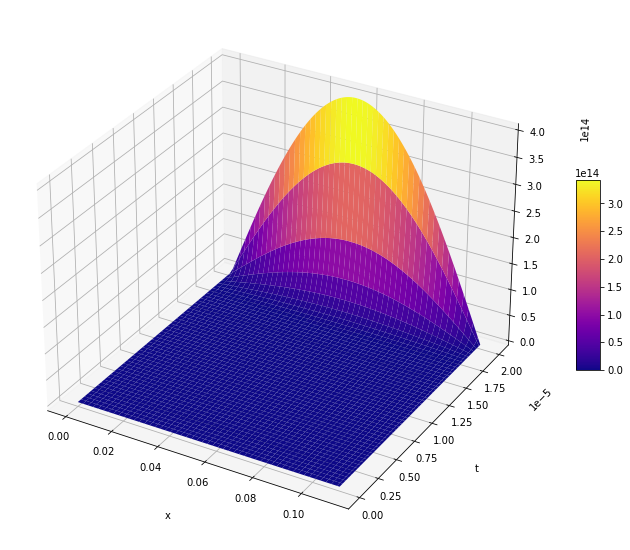

In [1]:
import numpy as np
from scipy.integrate import quad, dblquad, tplquad
from scipy.optimize import fsolve
import scipy.special as sc
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#set up the constants
A = 1
Lambda = 100
L = 0.111
mu = 2.3446*pow(10,5)
eta = 1.8958*pow(10,8)

# compute the coefficients and the solution n through integration using scipy
def n(x,t):
    n = 0
    coeff = []
    for p in range(1, 30):
        integrand = lambda x: 2/L * A*np.exp(-4*Lambda*(x-L/2)**2/L**2) * np.sin(x*p*np.pi/L)
        integral, integral_error = quad(integrand, 0, L)
        coeff.append(round(integral,4))
        n += integral*np.exp(eta*t - mu*(p**2*np.pi**2/L**2)*t) * np.sin((p*np.pi/L)*x)
    print('The coeffcients are: ')
    print(*coeff, sep=", ")
    return n
        
# plot the solution
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
x = np.linspace(0, L, 100)
t = np.linspace(0, 0.000020, 100)
X, Y = np.meshgrid(x, t)
Z = n(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap = "plasma") 
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('n', labelpad=20)
fig.colorbar(surf, shrink=0.35, aspect=8)
plt.show()

# 2-D case cartesian coordinates with Dirichlet BC

The coeffcients are: 
1.0651253, 0.0, 0.0394491, 0.0, 0.008521, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0394491, -0.0, 0.0014611, 0.0, 0.0003156, 0.0, 0.0, -0.0, -0.0, 0.0, 0.008521, -0.0, 0.0003156, 0.0, 6.82e-05


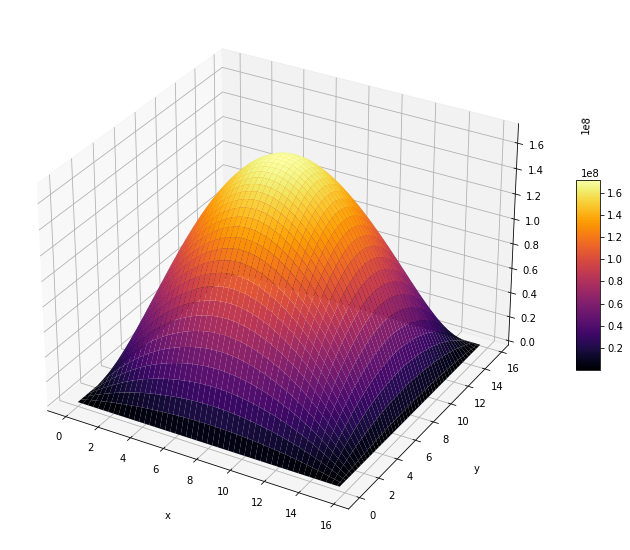

In [32]:
#set up the constants
L = 15.7
mu = 2.3446*pow(10,5)
eta = 1.8958*pow(10,8)
t = pow(10, -7)

# compute the coefficients and the solution n through integration using scipy at fixed t=10^-7
def n(x,y):
    n = 0
    coeff = []
    for p in range(1,6):
        for q in range(1,6):
            integrand = lambda x, y: (4/L**2) * (16*x*y/L**2) * (1-x/L) * (1-y/L) * np.sin(np.pi*p*x/L) * np.sin(np.pi*q*y/L)
            integral, integral_error = dblquad(integrand, 0, L, 0, L)
            coeff.append(round(integral,7))
            n += integral*np.exp(eta*t - mu*np.pi**2*(p**2/L**2 + q**2/L**2)*t) * np.sin(p*np.pi*x/L) * np.sin(q*np.pi*y/L)
    print('The coeffcients are: ')
    print(*coeff, sep=", ")
    return n

# plot the solution
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)
Z = n(X,Y)
surf = ax.plot_surface(X, Y, Z, cmap = "inferno")
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('n', labelpad=20)
fig.colorbar(surf, shrink=0.35, aspect=8)
plt.show()

# 3-D case cartesian coordinates with Dirichlet BC

The coeffcients are: 
0.137408, 0.0, 0.005089, 0.0, 0.0, 0.0, 0.0, -0.0, 0.005089, 0.0, 0.000188, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.005089, 0.0, 0.000188, 0.0, 0.0, 0.0, -0.0, 0.0, 0.000188, 0.0, 7e-06, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0


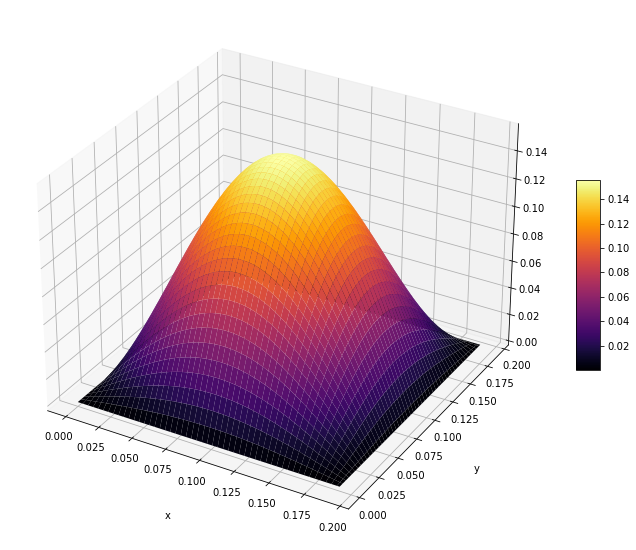

In [34]:
# set up the constants
L = 0.192
eta = 1.8958*pow(10,8)
mu = 2.3446*pow(10,5)
t = pow(10, -7)

# compute the coefficients and the solution n through integration using scipy at fixed t=10^-7
def n(x,y,z):
    n = 0
    coeff = []
    for p in range(1,5):
        for q in range(1,5):
            for r in range(1,5):
                integrand = lambda x, y, z: (8/L**3) * (8*x*y*z/L**3) * (1-x/L) * (1-y/L) * (1-z/L) * np.sin(p*np.pi*x/L) * np.sin(q*np.pi*y/L) * np.sin(r*np.pi*z/L)
                integral, integral_error = tplquad(integrand, 0, L, 0, L, 0, L)
                coeff.append(round(integral,6))
                n += integral*np.exp(eta*t - mu*np.pi**2*(p**2/L**2 + q**2/L**2 + r**2/L**2)*t) * np.sin(p*np.pi*x/L) * np.sin(q*np.pi*y/L) * np.sin(r*np.pi*z/L)
    print('The coeffcients are: ')
    print(*coeff, sep=", ")
    return n

# plot the solution
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
z = L/2
X, Y, = np.meshgrid(x, y)
Z = n(X,Y,z)
surf = ax.plot_surface(X, Y, Z, cmap = "inferno")
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('n', labelpad=20)
fig.colorbar(surf, shrink=0.35, aspect=8)
plt.show()

# 3-D case cylindrical coordinates with Dirichlet BC

The coeffcients are: 
1.108022, -0.139778, 0.045476, -0.020991, 0.011636, -0.007221, 0.004838, -0.003426, 0.00253, -0.00193


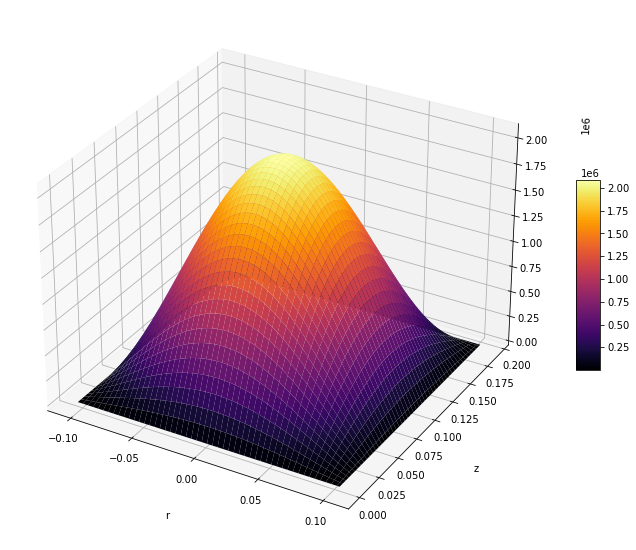

In [37]:
# set up the constants
L = 0.192
r_1 = 0.104
eta = 1.8958*pow(10,8)
mu = 2.3446*pow(10,5)
t = pow(10,-5)
zeros = sc.jn_zeros(0, 10)

# compute the coefficients and the solution n through integration using scipy at fixed t=10^-5
def n(r,z):
    n = 0
    coeff = []
    for q in range(1,11):
        integrand = lambda r, z : 4/(L*r_1**2*(sc.jv(1, zeros[q-1]))**2) * sc.jv(0, zeros[q-1]*r/r_1) * r * (1-r**2/r_1**2) * (np.sin(np.pi*z/L))**2
        integral, integral_error = dblquad(integrand, 0, L, 0, r_1)
        coeff.append(round(integral,6))
        n += integral*sc.jv(0, zeros[q-1]*r/r_1)*np.sin(np.pi*z/L)*np.exp((eta*r_1**2*L**2 - mu*((zeros[q-1])**2*L**2+np.pi**2*r_1**2))*t/(r_1**2*L**2))
    print('The coeffcients are: ')
    print(*coeff, sep=", ")
    return n

# plot the solution
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
r = np.linspace(-r_1, r_1, 100)
z = np.linspace(0, L, 100)
X, Y = np.meshgrid(r, z)
Z = n(X,Y)
surf = ax.plot_surface(X, Y, Z, cmap = "inferno")
ax.set_xlabel('r', labelpad=20)
ax.set_ylabel('z', labelpad=20)
ax.set_zlabel('n', labelpad=20)
fig.colorbar(surf, shrink=0.35, aspect=8)
plt.show()

# 3-D case spherical coordinates with Dirichlet BC

The coeffcients are: 
0.044507, -0.005563, 0.001648, -0.000695, 0.000356, -0.000206, 0.00013, -8.7e-05, 6.1e-05, -4.5e-05, 3.3e-05, -2.6e-05, 2e-05, -1.6e-05, 1.3e-05, -1.1e-05, 9e-06, -8e-06, 6e-06, -6e-06, 5e-06, -4e-06, 4e-06, -3e-06, 3e-06, -3e-06, 2e-06, -2e-06, 2e-06, -2e-06


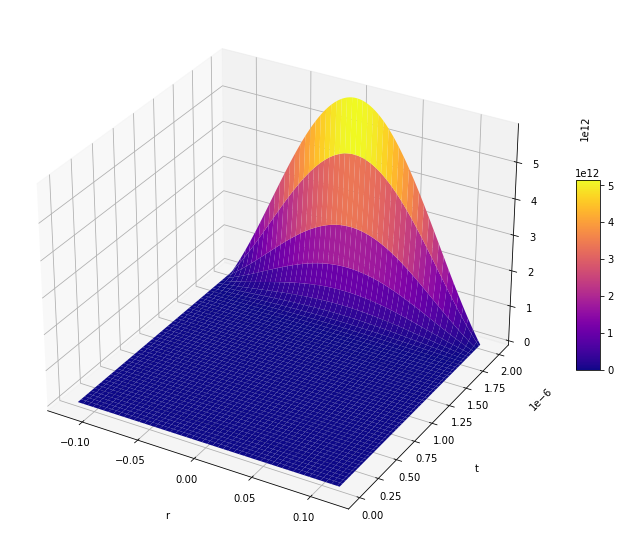

In [49]:
#set up the constants
r_1 = 0.115
eta = 1.8958*pow(10,8)
mu = 2.3446*pow(10,5)

# compute the coefficients and the solution n through integration using scipy
def n(r,t):
    n = 0
    coeff = []
    for p in range(1, 31):
        integrand = lambda r: (2/r_1) * r * (1-(r/r_1)**2) * np.sin(p*np.pi*r/r_1)
        integral, integral_error = quad(integrand, 0, r_1)
        coeff.append(round(integral,6))
        n += integral/r * np.exp(eta*t - mu*(p**2*np.pi**2*t/r_1**2)) * np.sin((p*np.pi*r/r_1))
    print('The coeffcients are: ')
    print(*coeff, sep=", ")
    return n    
        
# plot the solution
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
r = np.linspace(-r_1, r_1, 100)
t = np.linspace(0, 2*pow(10,-6), 100)
X, Y = np.meshgrid(r, t)
Z = n(X, Y)
surf = ax.plot_surface(X, Y, Z, cmap = "plasma") 
ax.set_xlabel('r', labelpad = 20)
ax.set_ylabel('t', labelpad = 20)
ax.set_zlabel('n', labelpad = 20)
fig.colorbar(surf, shrink=0.35, aspect=8)
plt.show()

# 3-D case spherical coordinates with Neumann BC

In [2]:
# set up the constants
tau = 8.6349*pow(10,-9)
lambda_f = 0.1689*100 
lambda_t = 0.0360*100 
nu = 2.637 
rho = 18.71 
v = lambda_f/tau 
mu = lambda_t*v/3 
eta = v*(nu-1)/lambda_f 

# solve for r_crit using scipy
def f_r_crit(r_crit):
    return -1 + r_crit*np.sqrt(eta/mu)*1/(np.tan(r_crit*np.sqrt(eta/mu))) + (3/2)*(r_crit/lambda_t)
r_crit_sol = fsolve(f_r_crit, 8)
print('The critical radius is ' + str(r_crit_sol[0]) + ' cm')
print('The critical volume is ' + str(4/3 * np.pi*r_crit_sol[0]**3) + ' cm³')

The critical radius is 8.36930083845497 cm
The critical volume is 2455.591641763765 cm³


In [5]:
# fix r = R = 8.5 cm to find the separation constant alfa and k
R = 8.5

# solve for alfa using scipy
def f_alfa(alfa):
    return -1 + R*np.sqrt((eta+alfa)/mu)*1/np.tan(R*np.sqrt((eta+alfa)/mu)) + (3/2)*(R/lambda_t)
alfa_sol = fsolve(f_alfa, -4.4*pow(10,7))
k_sol = np.sqrt((eta + alfa_sol[0])/mu)
print('Alfa is ' + str(round(alfa_sol[0])))
print('k is '+ str(round(k_sol,4)))

Alfa is -4400951
k is 0.2809


In [6]:
# solve for A using scipy imposing the initial condition n(R, 0) = 1 
def n_initial(A):
    return A * np.sin(k_sol*R)/R - 1
A_sol = fsolve(n_initial, [-0.5, 0.5])
print('A is ' + str(round(A_sol[0],3)))

A is 12.415


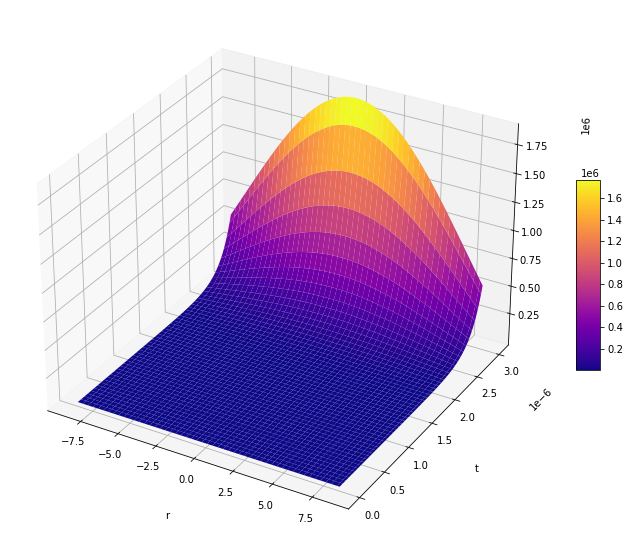

In [10]:
# plot the final solution n
def n(r,t):
    return A_sol[0] * np.exp(-alfa_sol[0]*t) * np.sin(k_sol*r)/r

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
r = np.linspace(-R, R, 100)
t = np.linspace(0, 3*pow(10,-6), 100)
X, Y = np.meshgrid(r, t)
Z = n(X,Y)
surf = ax.plot_surface(X, Y, Z, cmap = "plasma")
ax.set_xlabel('r', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('n', labelpad=20)
fig.colorbar(surf, shrink=0.35, aspect=8)
plt.show()